In [1]:
"""
------------------------------------------------------------------------------
About
In this data analysis, the total gross roof area [m²] suitable for photovoltaics 
is calculated for each admin area.
------------------------------------------------------------------------------
"""


'\n------------------------------------------------------------------------------\nAbout\nIn this data analysis, the total gross roof area [m²] suitable for photovoltaics \nis calculated for each admin area.\n------------------------------------------------------------------------------\n'

In [2]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import pandas as pd
import geopandas as gpd

In [3]:
"""
------------------------------------------------------------------------------
Load GeoJson files
------------------------------------------------------------------------------
"""

admin_areas = gpd.read_file("../data/raw/Prognoseräume.json")

solarPotential = gpd.read_file("../data/raw/Solarpotenzial.geojson")

In [4]:
solarPotential.head()

,id,geb_id,sum_modarea,sum_str_19_5,sum_co2_19_5,sum_kw_19_5,sum_anzahl_0,lage,geb_funktion,geometry
0,4,Geb4047ts0202_a,NaN,NaN,NaN,NaN,NaN,Beusselstraße 44R,"Lagerhalle, Lagerschuppen, Lagerhaus","MULTIPOLYGON (((386541.6 5821684.175, 386542.5..."
1,18,Geb110278ts0202_a,13.0,3106.0,1690.0,3.20,10.0,Heckerdamm 197,Wohnhaus,"MULTIPOLYGON (((385488.209 5822180.221, 385488..."
2,51,Geb1462ts0202_a,880.0,88420.0,48101.0,118.08,369.0,Philippstraße 13,"Hochschulgebäude (Fachhochschule, Universität)","MULTIPOLYGON (((390368.993 5820760.62, 390370...."
3,61,Geb109923ts0202_a,NaN,NaN,NaN,NaN,NaN,None,Gebäudefunktion unbekannt,"MULTIPOLYGON (((385602.265 5820331.048, 385594..."
4,76,Geb102147ts0202_a,NaN,NaN,NaN,NaN,NaN,None,Gebäudefunktion unbekannt,"MULTIPOLYGON (((385612.521 5820344.426, 385613..."


In [5]:
"""
------------------------------------------------------------------------------
geb_id	        Schlüssel
lage_	        Adresse
geb_funktion	Gebäudefunktion
sum_kw_19_5	    Installierbare Leistung [kWP]
sum_anzahl_0	Anzahl Standardmodule
sum_modarea	    Geeignette Brutto-Dachfläche [m²]
sum_str_19_5	Möglicher Ertrag pro Jahr [kWh/a]
sum_co2_19_5	CO2-Einsparung pro Jahr [kg/a]
------------------------------------------------------------------------------
"""


'\n------------------------------------------------------------------------------\ngeb_id\t        Schlüssel\nlage_\t        Adresse\ngeb_funktion\tGebäudefunktion\nsum_kw_19_5\t    Installierbare Leistung [kWP]\nsum_anzahl_0\tAnzahl Standardmodule\nsum_modarea\t    Geeignette Brutto-Dachfläche [m²]\nsum_str_19_5\tMöglicher Ertrag pro Jahr [kWh/a]\nsum_co2_19_5\tCO2-Einsparung pro Jahr [kg/a]\n------------------------------------------------------------------------------\n'

In [6]:
#convert polygon into centroid
solarPotential["centroid"] = solarPotential.geometry.centroid
gdf_solarPotential = solarPotential.drop(columns = "geometry")

gdf_solarPotential = gdf_solarPotential.set_geometry("centroid") 

gdf_solarPotential.head()

,id,geb_id,sum_modarea,sum_str_19_5,sum_co2_19_5,sum_kw_19_5,sum_anzahl_0,lage,geb_funktion,centroid
0,4,Geb4047ts0202_a,NaN,NaN,NaN,NaN,NaN,Beusselstraße 44R,"Lagerhalle, Lagerschuppen, Lagerhaus",POINT (386542.471 5821682.891)
1,18,Geb110278ts0202_a,13.0,3106.0,1690.0,3.20,10.0,Heckerdamm 197,Wohnhaus,POINT (385491.352 5822183.287)
2,51,Geb1462ts0202_a,880.0,88420.0,48101.0,118.08,369.0,Philippstraße 13,"Hochschulgebäude (Fachhochschule, Universität)",POINT (390361.731 5820796.957)
3,61,Geb109923ts0202_a,NaN,NaN,NaN,NaN,NaN,None,Gebäudefunktion unbekannt,POINT (385599.015 5820334.119)
4,76,Geb102147ts0202_a,NaN,NaN,NaN,NaN,NaN,None,Gebäudefunktion unbekannt,POINT (385611.023 5820337.078)


In [7]:
"""
------------------------------------------------------------------------------
Checking invalid geometries
------------------------------------------------------------------------------
"""

#Check the combined dataframe for empty or invalid geometries
print(f"Empty geometry in gdf_solarPotential: {len(gdf_solarPotential[gdf_solarPotential.is_empty])}")
print(f"Invalid geometry in gdf_solarPotential: {len(gdf_solarPotential[~gdf_solarPotential.is_valid])}")

Empty geometry in df_Solarpotential: 24
Invalid geometry in df_Solarpotential: 0


In [8]:
"""
------------------------------------------------------------------------------
Data exploration
------------------------------------------------------------------------------
"""

gdf_solarPotential.shape

(537332, 10)

In [9]:
gdf_solarPotential.isna().sum()

id                   0
geb_id            1542
sum_modarea     116220
sum_str_19_5    116220
sum_co2_19_5    116220
sum_kw_19_5     116220
sum_anzahl_0    116220
lage               978
geb_funktion         0
centroid             0
dtype: int64

In [10]:
gdf_solarPotential.dropna(inplace=True)

In [11]:
gdf_solarPotential.shape

(420529, 10)

In [12]:
gdf_solarPotential.dtypes

id                 int32
geb_id            object
sum_modarea      float64
sum_str_19_5     float64
sum_co2_19_5     float64
sum_kw_19_5      float64
sum_anzahl_0     float64
lage              object
geb_funktion      object
centroid        geometry
dtype: object

In [13]:
#subset
cols = ["sum_modarea", "sum_str_19_5", "sum_co2_19_5", "sum_kw_19_5", "sum_anzahl_0"]
#convert to int
gdf_solarPotential[cols] = gdf_solarPotential[cols].astype(int)

<Axes: >

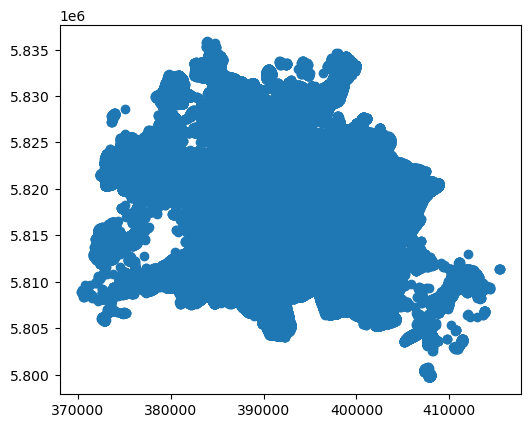

In [14]:
gdf_solarPotential.plot()

In [15]:
"""
------------------------------------------------------------------------------
CSR (coordinate reference system)
------------------------------------------------------------------------------
"""

#Check CRS
print(admin_areas.crs)
print(gdf_solarPotential.crs)

EPSG:4326
EPSG:25833


In [16]:
#Ensure both GeoDataFrames have the same CRS 
if admin_areas.crs != gdf_solarPotential.crs:
    gdf_solarPotential = gdf_solarPotential.to_crs(admin_areas.crs)

In [19]:
"""
------------------------------------------------------------------------------
Functions
solar potential by admin area
sum_str_19_5: Potential annual yield [kWh/a]
------------------------------------------------------------------------------
"""


def calculate_solar_potential(admin_area, gdf_solarPotential):
    #find intersections between the solar potential dataframe and admin areas
    intersections = gdf_solarPotential[gdf_solarPotential.intersects(admin_area.geometry)]
    
    #calculate the total sum of the potential annual yield [kWh/a]
    total_anual_yield_kwa = intersections["sum_str_19_5"].sum()

    print(f"Admin Area: {admin_area["pgr_name"]}, Total anual yield in kw/a: {total_anual_yield_kwa}")
    
    return  total_anual_yield_kwa




In [20]:
#calculation of total_sum_modarea for each administrative area
admin_areas["total_anual_yield_kwa"] = admin_areas.apply(
    lambda row: calculate_solar_potential(row, gdf_solarPotential), axis=1
)


Admin Area: Südlicher Prenzlauer Berg, Total anual yield in kw/a: 72236795
Admin Area: Kreuzberg Süd, Total anual yield in kw/a: 97948901
Admin Area: Marienfelde / Lichtenrade, Total anual yield in kw/a: 279482841
Admin Area: Wilhelmstadt / Staaken, Total anual yield in kw/a: 226738687
Admin Area: Nördliches Weißensee, Total anual yield in kw/a: 122204229
Admin Area: Tempelhof, Total anual yield in kw/a: 200887325
Admin Area: Lichtenberg Nord, Total anual yield in kw/a: 155324369
Admin Area: Lichtenberg Mitte, Total anual yield in kw/a: 95627659
Admin Area: Hellersdorf, Total anual yield in kw/a: 94059732
Admin Area: Buch, Total anual yield in kw/a: 56088609
Admin Area: Hohenschönhausen Nord, Total anual yield in kw/a: 80508983
Admin Area: Kaulsdorf/Mahlsdorf, Total anual yield in kw/a: 190288332
Admin Area: Treptow-Köpenick 1, Total anual yield in kw/a: 129205562
Admin Area: Tegel, Total anual yield in kw/a: 162612729
Admin Area: Mariendorf, Total anual yield in kw/a: 132641917
Admin 

In [21]:
#subset
solarPotential_m2 = admin_areas[["pgr_id", "pgr_name", "total_anual_yield_kwa"]]
#sort values descending
solarPotential_m2.sort_values(by="total_anual_yield_kwa", ascending=False, inplace=True)
solarPotential_m2.reset_index(drop=True, inplace=True)

solarPotential_m2.head(20)

/var/folders/_f/022l68353h9c2pr_3t55ns1m0000gn/T/ipykernel_7949/4248046271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Solarpotential_m2.sort_values(by="total_anual_yield_kwa", ascending=False, inplace=True)


,pgr_id,pgr_name,total_anual_yield_kwa
0,0110,Zentrum,302985574
1,0760,Marienfelde / Lichtenrade,279482841
2,0510,Spandau Mitte / Nord,233246799
3,0520,Wilhelmstadt / Staaken,226738687
4,0810,Neukölln,219884036
5,0920,Treptow-Köpenick 2,217377622
6,0630,Zehlendorf Süd/Lichterfelde West,213559386
7,1010,Marzahn,203553759
8,0740,Tempelhof,200887325
9,0430,Charlottenburg Zentrum,193671127


In [22]:
#csv
solarPotential_m2.to_csv("../data/csv/solarPotential.csv", index=False)